In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for interactive plots
import plotly.express as px

# Google Drive mount (agar nahi kiya to)
from google.colab import drive
drive.mount('/content/drive')

# File paths (update your actual drive path)
orders_path = '/content/drive/MyDrive/List of Orders.csv'
details_path = '/content/drive/MyDrive/Order Details.csv'
target_path = '/content/drive/MyDrive/Sales target.csv'

# CSV load karna
df_orders = pd.read_csv(orders_path)
df_details = pd.read_csv(details_path)
df_target = pd.read_csv(target_path)

# Dataset info check
print("Orders Dataset:")
print(df_orders.info())
print(df_orders.head())

print("\nOrder Details Dataset:")
print(df_details.info())
print(df_details.head())

print("\nSales Target Dataset:")
print(df_target.info())
print(df_target.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Orders Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB
None
  Order ID  Order Date CustomerName           State       City
0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
1  B-25602  01-04-2018        Pearl     Maharashtra       Pune
2  B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal
3  B-25604  03-04-2018       Divsha       Rajasthan     Jaipur
4  B-25605  05-04-2018      Kasheen     West Bengal    Kolkata

Order Details Dataset:
<class 'p

In [4]:
import pandas as pd

df_orders['Order Date'] = pd.to_datetime(df_orders['Order Date'], format='%d-%m-%Y')

In [5]:
sales_target['Month of Order Date'] = pd.to_datetime(sales_target['Month of Order Date'], format='%b-%y')


NameError: name 'sales_target' is not defined

In [6]:
df_target['Month of Order Date'] = pd.to_datetime(df_target['Month of Order Date'], format='%b-%y')

In [8]:
df_orders.drop_duplicates(inplace=True)
df_details.drop_duplicates(inplace=True)
df_target.drop_duplicates(inplace=True)

In [10]:
full_data = pd.merge(df_details, df_orders, on='Order ID', how='left')

In [11]:
full_data.head()
full_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      1500 non-null   object        
 1   Amount        1500 non-null   float64       
 2   Profit        1500 non-null   float64       
 3   Quantity      1500 non-null   int64         
 4   Category      1500 non-null   object        
 5   Sub-Category  1500 non-null   object        
 6   Order Date    1500 non-null   datetime64[ns]
 7   CustomerName  1500 non-null   object        
 8   State         1500 non-null   object        
 9   City          1500 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 117.3+ KB


In [12]:
full_data['Month'] = full_data['Order Date'].dt.month
full_data['Year'] = full_data['Order Date'].dt.year
full_data['Month-Year'] = full_data['Order Date'].dt.to_period('M')


In [13]:
total_sales = full_data['Amount'].sum()
total_profit = full_data['Profit'].sum()
print("Total Sales:", total_sales)
print("Total Profit:", total_profit)


Total Sales: 431502.0
Total Profit: 23955.0


In [15]:
sales_by_category = full_data.groupby('Category')[['Amount', 'Profit']].sum().reset_index()

In [16]:
top_cities = full_data.groupby('City')['Amount'].sum().sort_values(ascending=False).head(10)
top_states = full_data.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)


In [17]:
monthly_sales = full_data.groupby('Month-Year')['Amount'].sum()
monthly_profit = full_data.groupby('Month-Year')['Profit'].sum()


In [18]:
monthly_category_sales = full_data.groupby(['Month-Year', 'Category'])['Amount'].sum().reset_index()


In [20]:
target_vs_actual = pd.merge(monthly_category_sales, df_target, left_on=['Month-Year', 'Category'],
                            right_on=['Month of Order Date', 'Category'], how='left')
target_vs_actual['Difference'] = target_vs_actual['Amount'] - target_vs_actual['Target']

In [22]:
target_vs_actual['Status'] = target_vs_actual['Difference'].apply(lambda x: 'Achieved' if x >= 0 else 'Below Target')
target_vs_actual[['Month-Year','Category','Amount','Target','Difference','Status']]

,Month-Year,Category,Amount,Target,Difference,Status
0,2018-04,Clothing,13478.0,NaN,NaN,Below Target
1,2018-04,Electronics,11127.0,NaN,NaN,Below Target
2,2018-04,Furniture,8121.0,NaN,NaN,Below Target
3,2018-05,Clothing,9518.0,NaN,NaN,Below Target
4,2018-05,Electronics,12807.0,NaN,NaN,Below Target
5,2018-05,Furniture,6220.0,NaN,NaN,Below Target
6,2018-06,Clothing,8782.0,NaN,NaN,Below Target
7,2018-06,Electronics,9344.0,NaN,NaN,Below Target
8,2018-06,Furniture,5532.0,NaN,NaN,Below Target
9,2018-07,Clothing,2981.0,NaN,NaN,Below Target


In [23]:
category_performance = target_vs_actual.groupby('Category')['Difference'].sum().sort_values(ascending=False)
print(category_performance)


Category
Clothing       0.0
Electronics    0.0
Furniture      0.0
Name: Difference, dtype: float64


In [24]:
category_worst = target_vs_actual.groupby('Category')['Difference'].sum().sort_values()
print(category_worst)


Category
Clothing       0.0
Electronics    0.0
Furniture      0.0
Name: Difference, dtype: float64


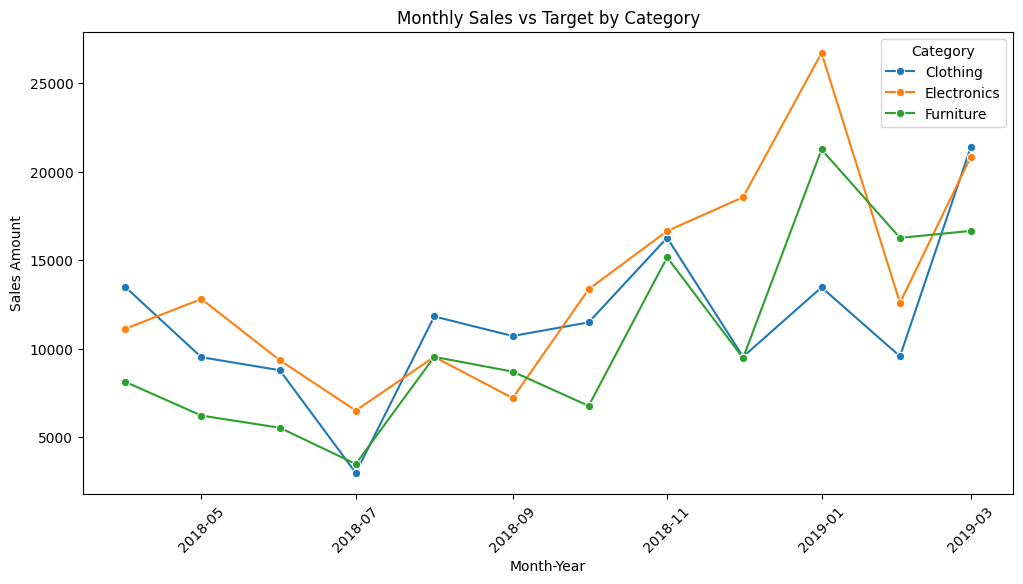

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Month-Year' back to datetime objects for plotting
target_vs_actual['Month-Year'] = target_vs_actual['Month-Year'].astype(str)
target_vs_actual['Month-Year'] = pd.to_datetime(target_vs_actual['Month-Year'])


plt.figure(figsize=(12,6))
sns.lineplot(data=target_vs_actual, x='Month-Year', y='Amount', hue='Category', marker='o')
sns.lineplot(data=target_vs_actual, x='Month-Year', y='Target', hue='Category', marker='x', linestyle='--', legend=False)
plt.xticks(rotation=45)
plt.ylabel('Sales Amount')
plt.title('Monthly Sales vs Target by Category')
plt.legend(title='Category')
plt.show()

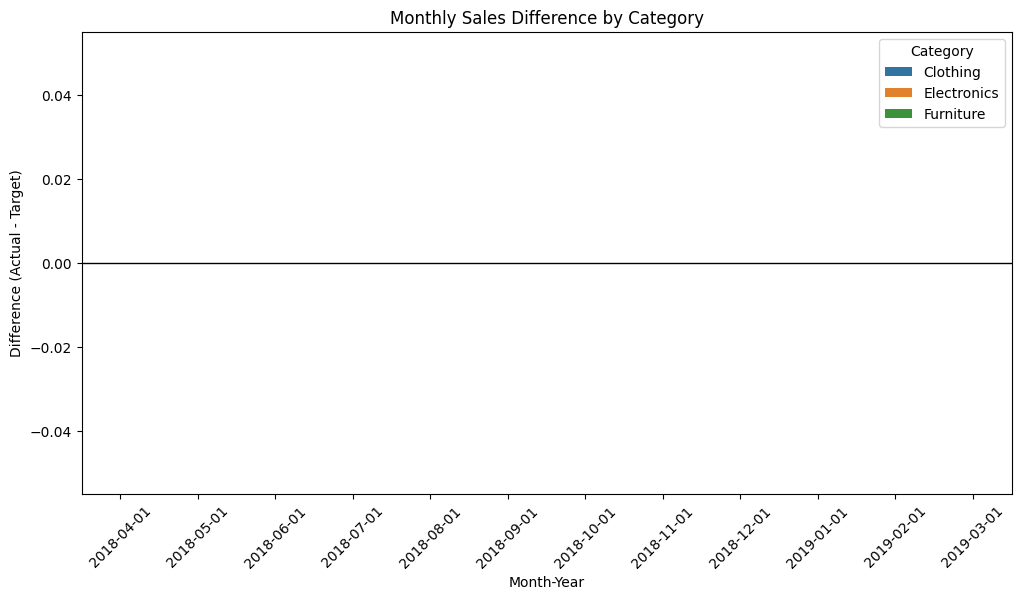

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(data=target_vs_actual, x='Month-Year', y='Difference', hue='Category')
plt.xticks(rotation=45)
plt.ylabel('Difference (Actual - Target)')
plt.title('Monthly Sales Difference by Category')
plt.axhline(0, color='black', linewidth=1)
plt.show()


In [29]:
state_sales = full_data.groupby('State')['Amount'].sum().sort_values(ascending=False).reset_index()
state_sales


,State,Amount
0,Madhya Pradesh,105140.0
1,Maharashtra,95348.0
2,Delhi,22531.0
3,Uttar Pradesh,22359.0
4,Rajasthan,21149.0
5,Gujarat,21058.0
6,Punjab,16786.0
7,Karnataka,15058.0
8,West Bengal,14086.0
9,Kerala,13459.0


In [30]:
state_profit = full_data.groupby('State')['Profit'].sum().sort_values(ascending=False).reset_index()
state_profit


,State,Profit
0,Maharashtra,6176.0
1,Madhya Pradesh,5551.0
2,Uttar Pradesh,3237.0
3,Delhi,2987.0
4,West Bengal,2500.0
5,Kerala,1871.0
6,Haryana,1325.0
7,Rajasthan,1257.0
8,Himachal Pradesh,656.0
9,Karnataka,645.0


In [31]:
top5_states = state_sales.head(5)


/tmp/ipython-input-823555587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_states, x='State', y='Amount', palette='viridis')


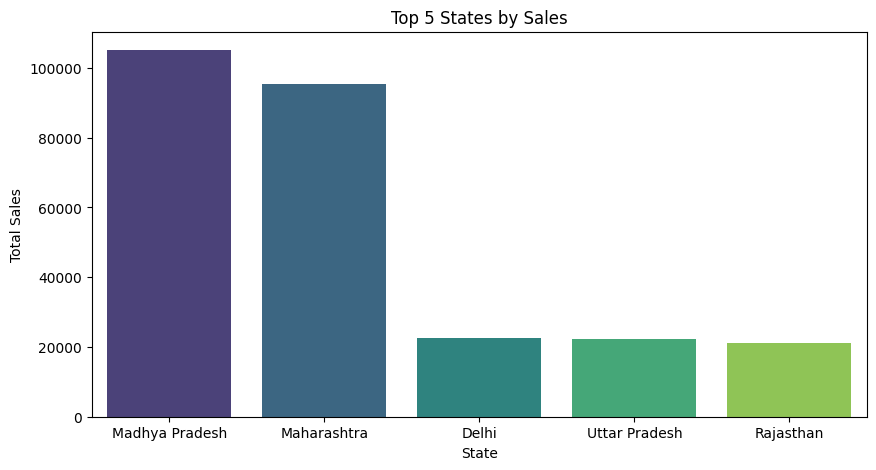

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(data=top5_states, x='State', y='Amount', palette='viridis')
plt.title('Top 5 States by Sales')
plt.ylabel('Total Sales')
plt.show()


In [33]:
city_sales = full_data.groupby('City')['Amount'].sum().sort_values(ascending=False).reset_index()
city_sales.head(10)   # Top 10 cities


,City,Amount
0,Indore,79069.0
1,Mumbai,61867.0
2,Pune,33481.0
3,Delhi,25019.0
4,Bhopal,23583.0
5,Chandigarh,21142.0
6,Allahabad,16857.0
7,Bangalore,15058.0
8,Ahmedabad,14230.0
9,Kolkata,14086.0


/tmp/ipython-input-3804184148.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_sales.head(10), x='City', y='Amount', palette='magma')


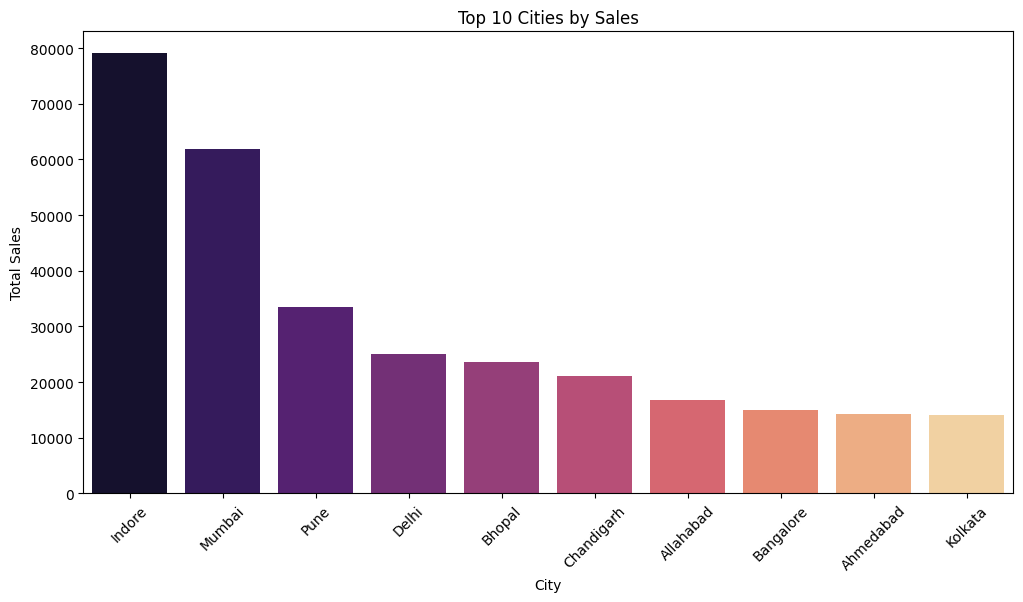

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(data=city_sales.head(10), x='City', y='Amount', palette='magma')
plt.xticks(rotation=45)
plt.title('Top 10 Cities by Sales')
plt.ylabel('Total Sales')
plt.show()


In [35]:
category_sales = full_data.groupby('Category')['Amount'].sum().reset_index()


In [36]:
sub_category_sales = full_data.groupby('Sub-Category')['Amount'].sum().sort_values(ascending=False).reset_index()


/tmp/ipython-input-2879442082.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub_category_sales.head(10), x='Sub-Category', y='Amount', palette='coolwarm')


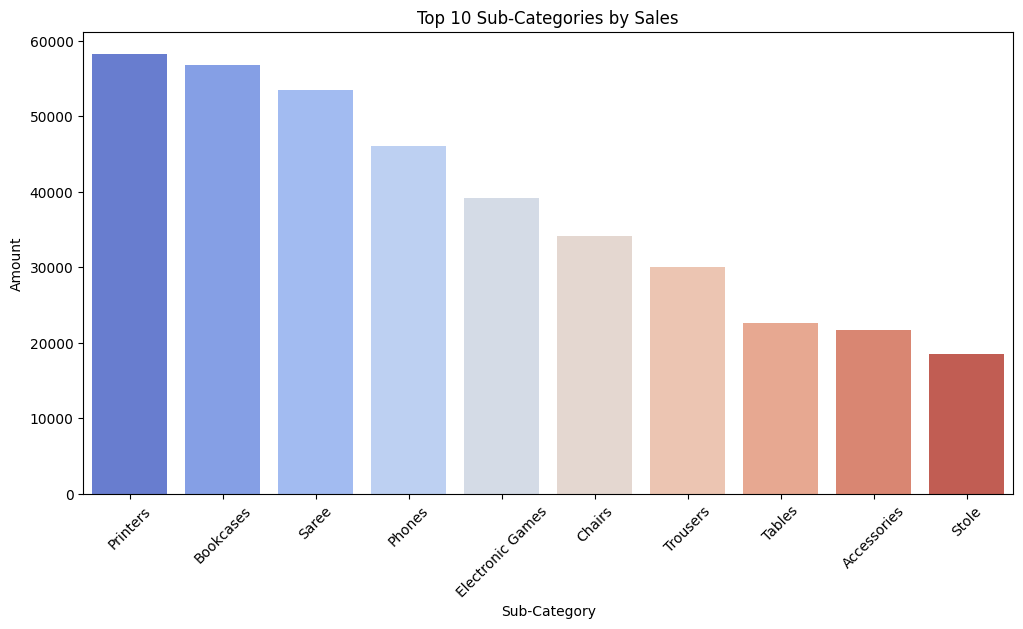

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(data=sub_category_sales.head(10), x='Sub-Category', y='Amount', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top 10 Sub-Categories by Sales')
plt.show()


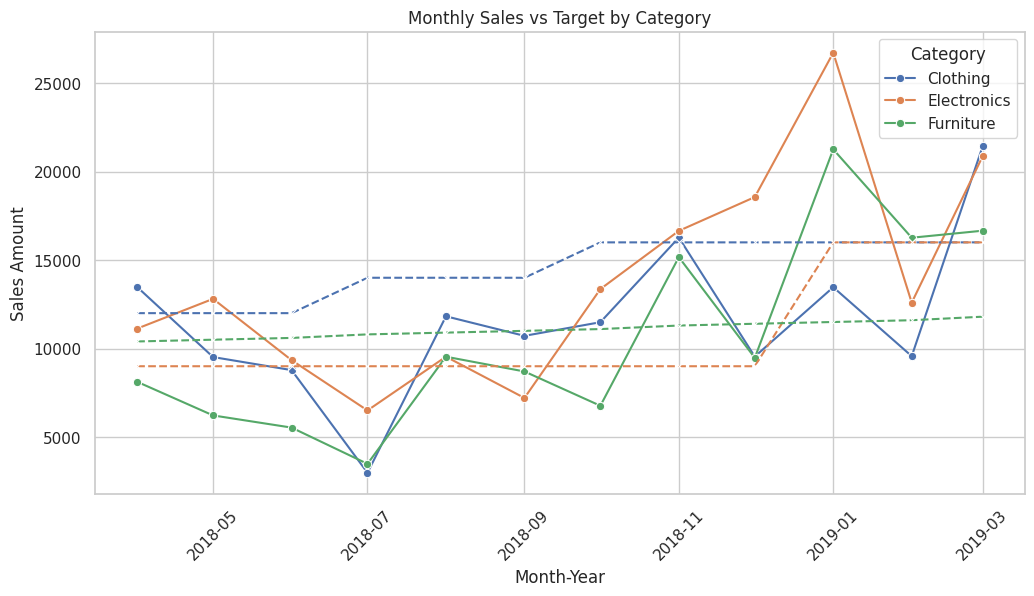

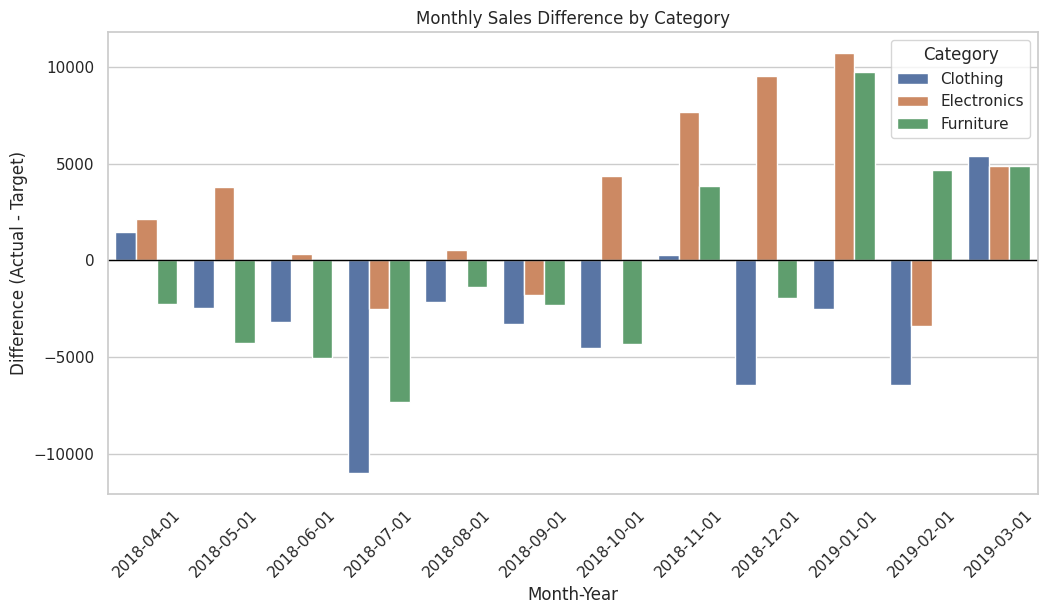

/tmp/ipython-input-3507780419.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sales.head(5), x='State', y='Amount', palette='viridis')


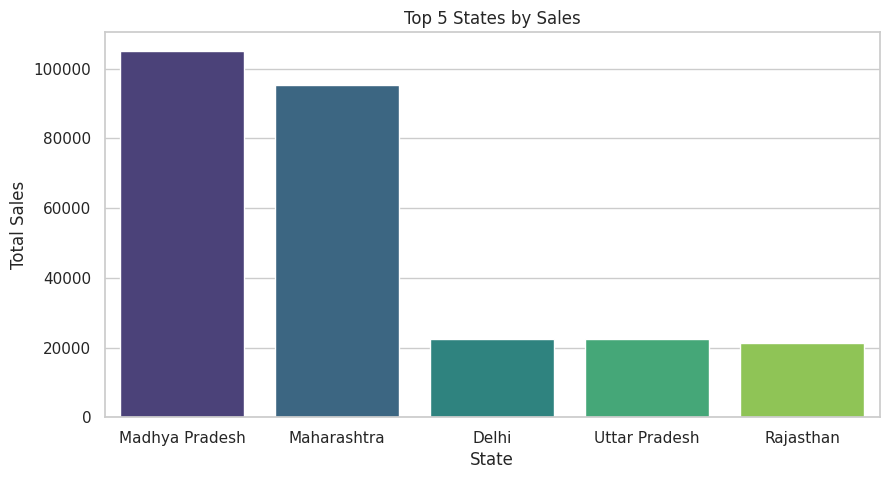

/tmp/ipython-input-3507780419.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_profit.head(5), x='State', y='Profit', palette='coolwarm')


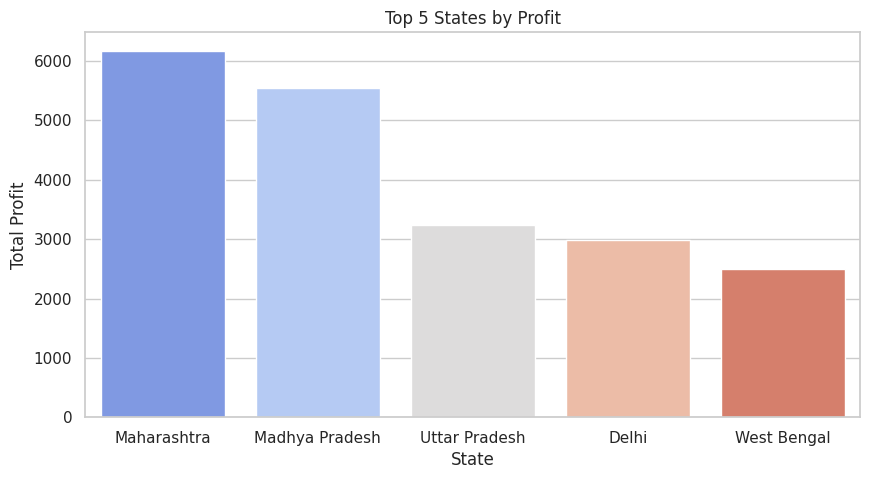

/tmp/ipython-input-3507780419.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_sales.head(10), x='City', y='Amount', palette='magma')


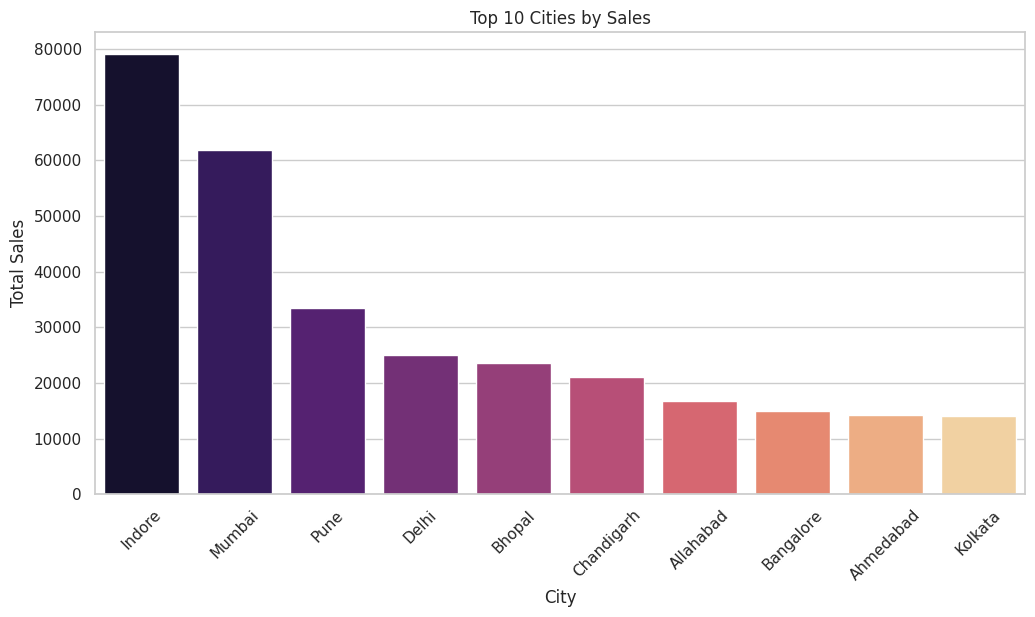

/tmp/ipython-input-3507780419.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub_category_sales.head(10), x='Sub-Category', y='Amount', palette='coolwarm')


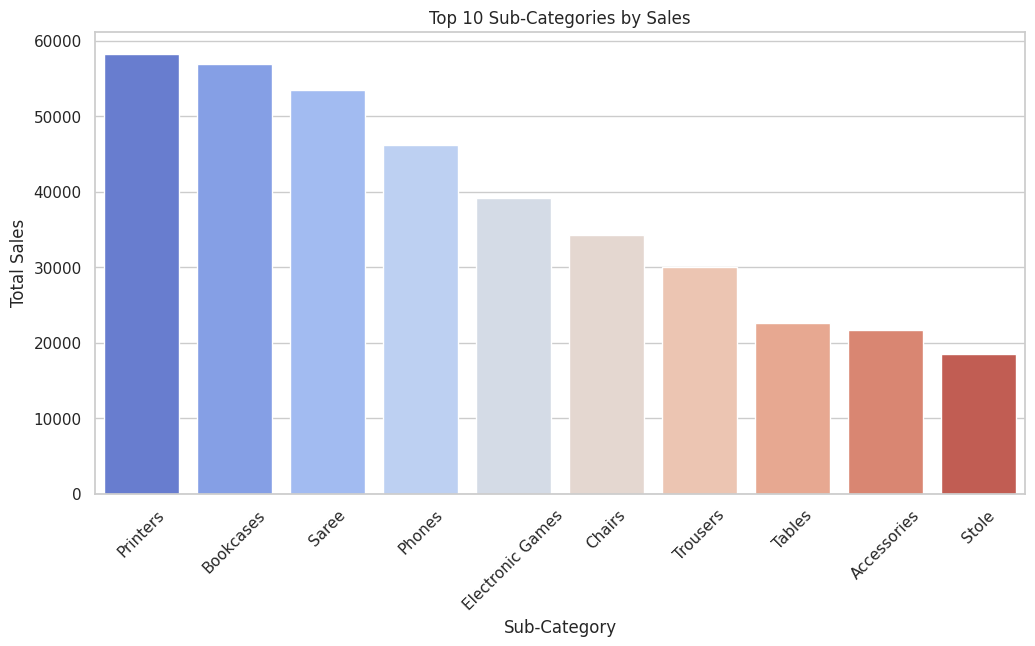

-------- Summary Metrics --------


,Metric,Value
0,Total Sales,431502.0
1,Total Profit,23955.0
2,Total Orders,500.0
3,Total Customers,332.0
4,Total States,19.0
5,Total Cities,24.0
6,Categories,3.0
7,Sub-Categories,17.0


In [40]:
# ---------------- Final E-commerce Analysis Report ---------------- #
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# --- Monthly Sales vs Target ---
monthly_category_sales = full_data.groupby(['Month-Year', 'Category'])['Amount'].sum().reset_index()
monthly_category_sales.rename(columns={'Amount':'Actual_Sales'}, inplace=True)

df_target.rename(columns={'Target':'Target_Sales'}, inplace=True)
df_target['Month-Year'] = df_target['Month of Order Date'].dt.to_period('M')

target_vs_actual = pd.merge(monthly_category_sales,
                            df_target[['Month-Year','Category','Target_Sales']],
                            on=['Month-Year','Category'], how='left')
target_vs_actual['Difference'] = target_vs_actual['Actual_Sales'] - target_vs_actual['Target_Sales']
target_vs_actual['Status'] = target_vs_actual['Difference'].apply(lambda x: 'Achieved' if x>=0 else 'Below Target')

# Convert 'Month-Year' back to datetime objects for plotting
target_vs_actual['Month-Year'] = target_vs_actual['Month-Year'].astype(str)
target_vs_actual['Month-Year'] = pd.to_datetime(target_vs_actual['Month-Year'])


# ----- Visualization 1: Line Chart Monthly Sales vs Target -----
plt.figure(figsize=(12,6))
sns.lineplot(data=target_vs_actual, x='Month-Year', y='Actual_Sales', hue='Category', marker='o')
sns.lineplot(data=target_vs_actual, x='Month-Year', y='Target_Sales', hue='Category', marker='x', linestyle='--', legend=False)
plt.xticks(rotation=45)
plt.ylabel('Sales Amount')
plt.title('Monthly Sales vs Target by Category')
plt.show()

# ----- Visualization 2: Difference Bar Chart -----
plt.figure(figsize=(12,6))
sns.barplot(data=target_vs_actual, x='Month-Year', y='Difference', hue='Category')
plt.xticks(rotation=45)
plt.ylabel('Difference (Actual - Target)')
plt.title('Monthly Sales Difference by Category')
plt.axhline(0, color='black', linewidth=1)
plt.show()

# ----- State-wise Sales & Profit -----
state_sales = full_data.groupby('State')['Amount'].sum().sort_values(ascending=False).reset_index()
state_profit = full_data.groupby('State')['Profit'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=state_sales.head(5), x='State', y='Amount', palette='viridis')
plt.title('Top 5 States by Sales')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=state_profit.head(5), x='State', y='Profit', palette='coolwarm')
plt.title('Top 5 States by Profit')
plt.ylabel('Total Profit')
plt.show()

# ----- City-wise Sales -----
city_sales = full_data.groupby('City')['Amount'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=city_sales.head(10), x='City', y='Amount', palette='magma')
plt.xticks(rotation=45)
plt.title('Top 10 Cities by Sales')
plt.ylabel('Total Sales')
plt.show()

# ----- Sub-Category-wise Sales -----
sub_category_sales = full_data.groupby('Sub-Category')['Amount'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=sub_category_sales.head(10), x='Sub-Category', y='Amount', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top 10 Sub-Categories by Sales')
plt.ylabel('Total Sales')
plt.show()

# ----- Summary Table -----
summary = {
    'Total Sales': full_data['Amount'].sum(),
    'Total Profit': full_data['Profit'].sum(),
    'Total Orders': full_data['Order ID'].nunique(),
    'Total Customers': full_data['CustomerName'].nunique(),
    'Total States': full_data['State'].nunique(),
    'Total Cities': full_data['City'].nunique(),
    'Categories': full_data['Category'].nunique(),
    'Sub-Categories': full_data['Sub-Category'].nunique()
}

summary_df = pd.DataFrame(list(summary.items()), columns=['Metric','Value'])
print("-------- Summary Metrics --------")
display(summary_df)

# ---------------- End of Final Report ---------------- #